<a href="https://colab.research.google.com/github/Mastermrinal/personal_project-/blob/main/Copy_of_apple_stocks_forcasting__final__for__i%26e.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import math
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error,mean_absolute_error
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/AAPL.csv")

In [ ]:
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,19/01/2010,7.440357,7.685357,7.401429,7.680000,6.546569,730007600
1,20/01/2010,7.675357,7.698214,7.482143,7.561786,6.445801,612152800
2,21/01/2010,7.574286,7.618214,7.400357,7.431071,6.334380,608154400
3,22/01/2010,7.385000,7.410714,7.041429,7.062500,6.020201,881767600
4,25/01/2010,7.232500,7.310714,7.149643,7.252500,6.182161,1065699600
...,...,...,...,...,...,...,...
2744,10/12/2020,120.500000,123.870003,120.150002,123.239998,121.778130,81312200
2745,11/12/2020,122.430000,122.760002,120.550003,122.410004,120.957977,86939800
2746,14/12/2020,122.599998,123.349998,121.540001,121.779999,120.335457,79184500
2747,15/12/2020,124.339996,127.900002,124.129997,127.879997,126.363091,157243700


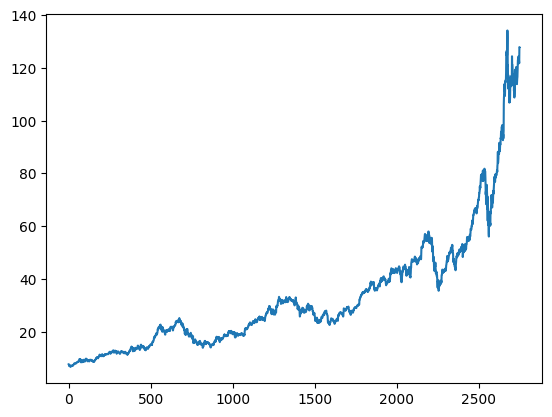

In [ ]:
plt.plot(df['Close'])
plt.show()

In [ ]:
##checking for staionarity
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
  dftest=adfuller(dataset,autolag='AIC')
  print("1.ADF:",dftest[0])
  print("2.p-value:",dftest[1])
  print("3.number of lags:",dftest[2])
  print("4.number of observations:",dftest[3])
  print("5.critical values:")
  for key,val in dftest[4].items():
    print("\t",key,":",val)

In [ ]:
ad_test(df['Adj Close'])

1.ADF: 3.4392091210211664
2.p-value: 1.0
3.number of lags: 27
4.number of observations: 2721
5.critical values:
	 1% : -3.432755542000777
	 5% : -2.862602793624982
	 10% : -2.567335759772529


In [ ]:
! pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 28.7 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima
stepwise_fit=auto_arima(df['Adj Close'],trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=2.44 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=9335.134, Time=0.12 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=8203.735, Time=0.10 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.57 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=7875.910, Time=0.25 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=7709.331, Time=0.29 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=7528.864, Time=0.46 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=7492.403, Time=0.68 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=2.09 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=2.55 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=7494.391, Time=2.20 sec

Best model:  ARIMA(5,2,0)(0,0,0)[0]          
Total fit time: 11.782 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2749
Model:               SARIMAX(5, 2, 0)   Log Likelihood               -3740.201
Date:                Fri, 14 Apr 2023   AIC                           7492.403
Time:                        20:56:24   BIC                           7527.912
Sample:                             0   HQIC                          7505.233
                               - 2749                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9516      0.007   -135.487      0.000      -0.965      -0.938
ar.L2         -0.7167      0.009    -78.951      0.000      -0.734      -0.699
ar.L3         -0.5425      0.008    -64.908      0.000      -0.559      -0.526
ar.L4         -0.3644      0.008    -43.459      0.000      -0.381      -0.348
ar.L5         -0.1190      0.007    -17.485      0.000      -0.132      -0.106
sigma2         0.8912      0.006    147.569      0.000       0.879       0.903
===================================================================================
Ljung-Box (L1) (Q):                   1.96   Jarque-Bera (JB):            118331.62
Prob(Q):                              0.16   Prob(JB):                         0.00
Heteroskedasticity (H):              36.24   Skew:                             0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                        35.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# slitting the data into tset and training **data**

In [ ]:
to_row=int(len(df)*0.7)
train_data=list(df[0:to_row]['Close'])
test_data=list(df[to_row:]['Close'])
test_data

[39.657501,
 40.375,
 40.215,
 39.912498,
 39.57,
 39.970001,
 39.6675,
 39.682499,
 39.017502,
 38.3475,
 37.9725,
 37.637501,
 38.285,
 38.557499,
 38.32,
 38.529999,
 38.452499,
 38.619999,
 38.369999,
 38.8475,
 38.825001,
 38.959999,
 38.974998,
 39.137501,
 39.0,
 39.247501,
 39.970001,
 40.1175,
 39.939999,
 38.994999,
 39.0625,
 39.0425,
 39.275002,
 39.102501,
 39.352501,
 40.762501,
 41.68,
 42.259998,
 41.7225,
 42.0275,
 43.125,
 43.5625,
 43.702499,
 44.060001,
 43.970001,
 43.6675,
 43.4925,
 42.834999,
 42.27,
 42.775002,
 42.537498,
 42.494999,
 43.285,
 43.740002,
 43.7425,
 43.522499,
 43.267502,
 42.369999,
 42.962502,
 42.762501,
 42.450001,
 42.41,
 42.252499,
 42.330002,
 42.342499,
 43.1675,
 42.924999,
 43.067501,
 43.055,
 43.4925,
 44.105,
 43.634998,
 43.587502,
 43.752499,
 43.752499,
 42.642502,
 42.650002,
 42.77,
 42.307499,
 43.064999,
 43.057499,
 43.2575,
 43.75,
 43.587502,
 43.5825,
 43.572498,
 43.82,
 44.272499,
 44.047501,
 44.775002,
 44.814999,


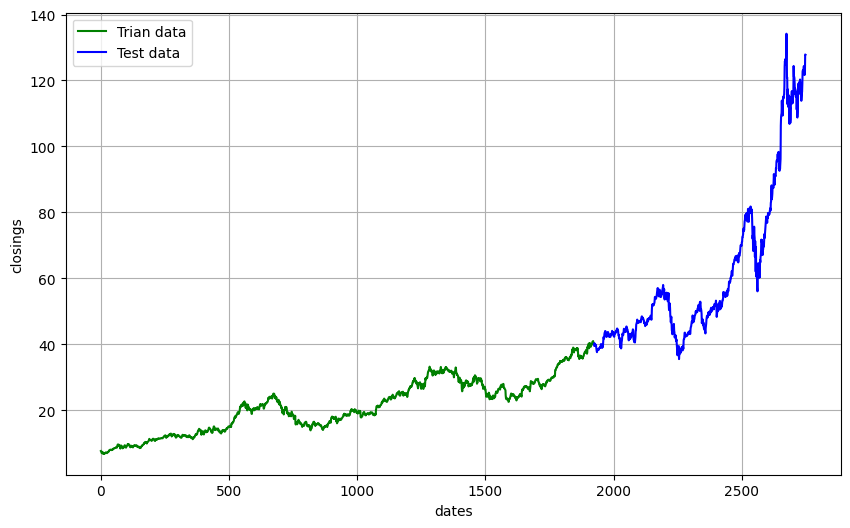

In [ ]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('dates')
plt.ylabel('closings')
plt.plot(df[0:to_row]['Close'],'green',label='Trian data')
plt.plot(df[to_row:]['Close'],'blue',label='Test data')
plt.legend()

In [ ]:
model_predictions=[]
n_test_obser=len(test_data)

In [ ]:
for i in range(n_test_obser):
  model=ARIMA(train_data,order=(5,2,0))
  model_fit=model.fit()
  output=model_fit.forecast()
  yhat=list(output)[0]
  model_predictions.append(yhat)
  actual_test_value=test_data[i]
  train_data.append(actual_test_value)


In [ ]:
list(output)

[127.59863418989157]

In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2750
Model:                 ARIMA(5, 2, 0)   Log Likelihood               -3819.170
Date:                Fri, 14 Apr 2023   AIC                           7650.340
Time:                        21:12:56   BIC                           7685.852
Sample:                             0   HQIC                          7663.171
                               - 2750                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9493      0.007   -132.232      0.000      -0.963      -0.935
ar.L2         -0.7160      0.009    -77.085      0.000      -0.734      -0.698
ar.L3         -0.5432      0.009    -63.460      0.000      -0.560      -0.526
ar.L4         -0.3643      0.009    -42.373      0.000      -0.381      -0.347
ar.L5         -0.1194      0.007    -17.131      0.000      -0.133      -0.106
sigma2         0.9430      0.007    144.201      0.000       0.930       0.956
===================================================================================
Ljung-Box (L1) (Q):                   1.95   Jarque-Bera (JB):            106770.79
Prob(Q):                              0.16   Prob(JB):                         0.00
Heteroskedasticity (H):              27.66   Skew:                             0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                        33.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
len(test_data)

275

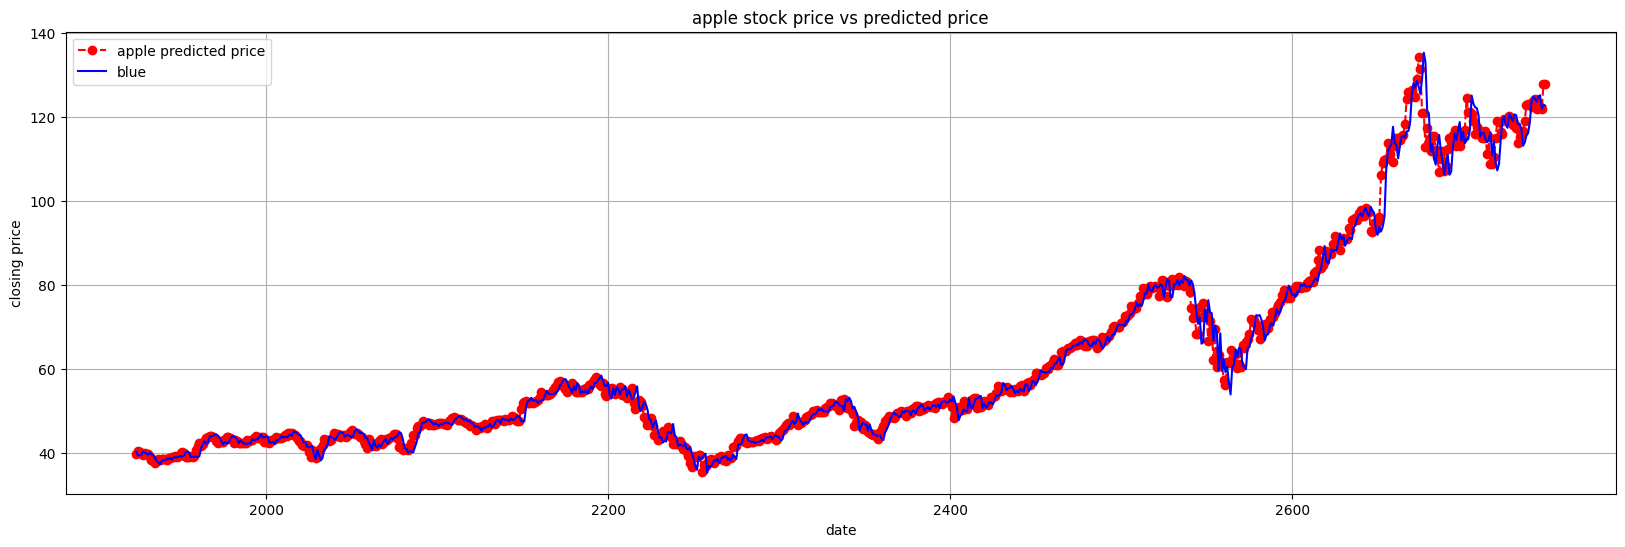

In [ ]:
plt.figure(figsize=(20,6))
plt.grid(True)
data_range=df[to_row:].index
plt.plot(data_range,test_data,color='red',marker='o',linestyle='dashed',label='apple predicted price')
plt.plot(data_range,model_predictions[:-2],color='blue',label='blue')
plt.title('apple stock price vs predicted price')
plt.xlabel('date')
plt.ylabel('closing price')
plt.legend()
plt.show()

In [ ]:
mape=np.mean(np.abs(np.array(model_predictions[:-2])-np.array(test_data))/np.abs(test_data))
print('MAPE:'+str(mape))

MAPE:0.024946830825462125


In [ ]:
##accuracy is about 98%